# House Price Prediction

**About the Dataset:**

The dataset used for this project is the **[Boston House Prices Dataset](https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data)**, which contains information about various attributes related to Boston suburbs and towns. These records were collected from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970.

**Attributes in the Dataset:**

- **CRIM**: Per capita crime rate by town.

- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.

- **INDUS**: Proportion of non-retail business acres per town.

- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise).

- **NOX**: Nitric oxides concentration (parts per 10 million).

- **RM**: Average number of rooms per dwelling.

- **AGE**: Proportion of owner-occupied units built before 1940.

- **DIS**: Weighted distances to five Boston employment centers.

- **RAD**: Index of accessibility to radial highways.

- **TAX**: Full-value property-tax rate per $10,000.

- **PTRATIO**: Pupil-teacher ratio by town.

- **B**: A derived feature, calculated as 1000 * (Bk - 0.63)^2, where Bk is the proportion of Black residents by town.

- **LSTAT**: Percentage of lower status population.

- **MEDV**: Median value of owner-occupied homes in $1000s.



## Import the necessary libraries:

In [1]:
import os
import sys
import random
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading DataSet:


In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
path="/content/drive/MyDrive/DataSets/houseprice.csv"
df=pd.read_csv(path,header=None, delimiter=r"\s+", names=column_names)

In [5]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [6]:
df.shape

(506, 14)

In [7]:
df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No missing values

In [10]:
miss_val=df.isnull().sum().sort_values(ascending=False)
miss_val=pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissValueCount'])

miss_val['Percent']=miss_val.MissValueCount.apply(lambda x:'{:.2f}'.format(float(x)/df.shape[0]*100))
miss_val=miss_val[miss_val.MissValueCount>=0]
miss_val

,MissValueCount,Percent
CRIM,0,0.00
ZN,0,0.00
INDUS,0,0.00
CHAS,0,0.00
NOX,0,0.00
RM,0,0.00
AGE,0,0.00
DIS,0,0.00
RAD,0,0.00
TAX,0,0.00


<Axes: xlabel='MEDV', ylabel='Density'>

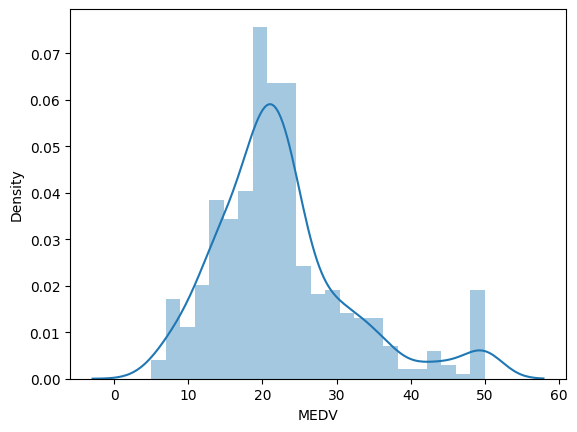

In [11]:
sns.distplot(df.MEDV)

## Initial Data Observations and Considerations

In the initial exploration of the dataset, several interesting observations and considerations have been identified that can inform our approach to the house price prediction task. These observations are as follows:

### 1. ZN (Proportion of Residential Land Zoned for Large Lots)
- The 25th and 50th percentiles of the 'ZN' column have values of 0, indicating that a significant portion of the data may have zero values for this feature.
- It's reasonable to assume that this variable might not have a strong influence on house prices if most values are zero.

### 2. CHAS (Charles River Dummy Variable)
- The 25th, 50th, and 75th percentiles of the 'CHAS' column are all 0, suggesting that this binary categorical variable might not have a significant impact on house prices in this dataset.

### 3. MEDV (Median Value of Owner-Occupied Homes)
- The maximum value of 'MEDV' is 50, and it is noted that the data description indicates that this variable is censored at 50.00, corresponding to a median price of $50,000.
- Values above 50 may not provide useful information for predicting house prices, and this censoring should be considered when building the regression model.

These initial observations guide our data preprocessing decisions, including the potential exclusion of the 'ZN' and 'CHAS' columns from our feature set and the handling of 'MEDV' values above 50. Furthermore, we will visualize the data to explore trends and relationships with the target variable ('MEDV') for a more comprehensive analysis.

Data exploration and understanding are fundamental steps in preparing the dataset for modeling and making informed decisions throughout the project.


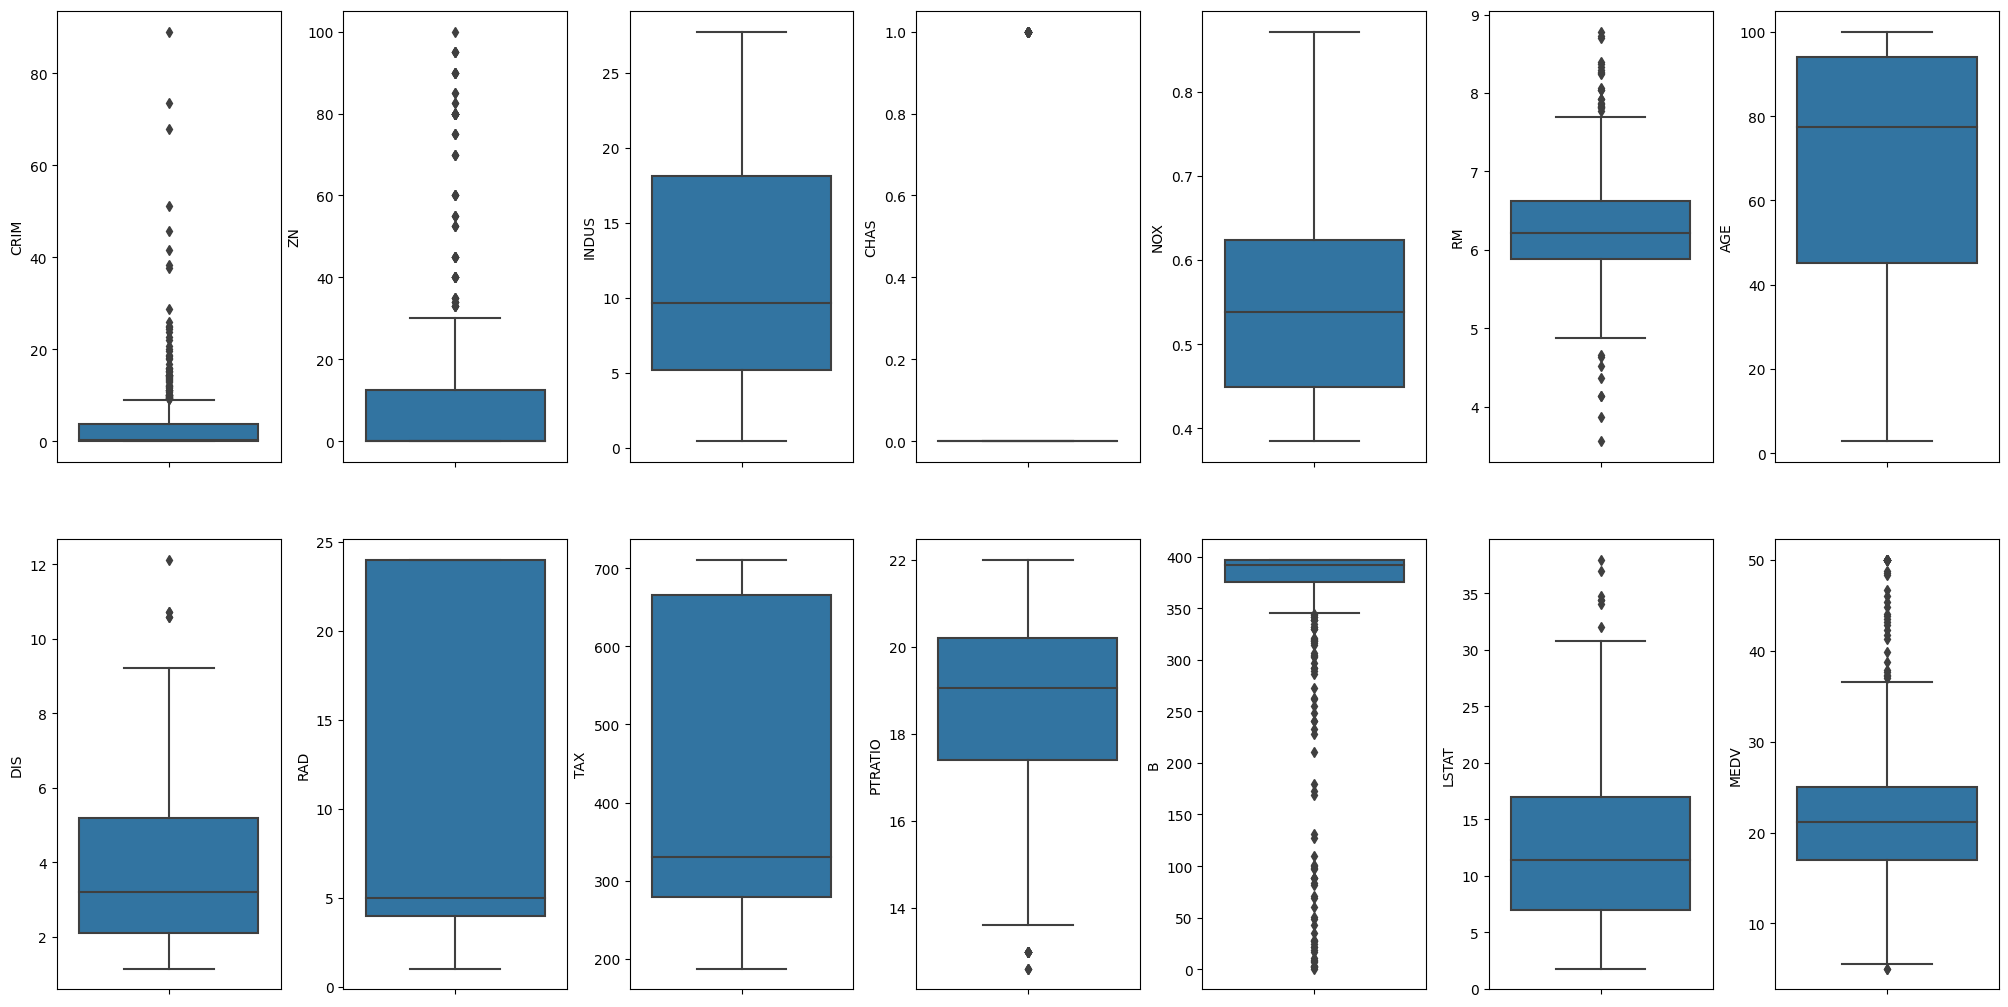

In [12]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [13]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Let's remove MEDV outliers (MEDV = 50.0) before plotting more distributions

In [14]:
data = df[~(df['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


Let's see how these features plus MEDV distributions looks like

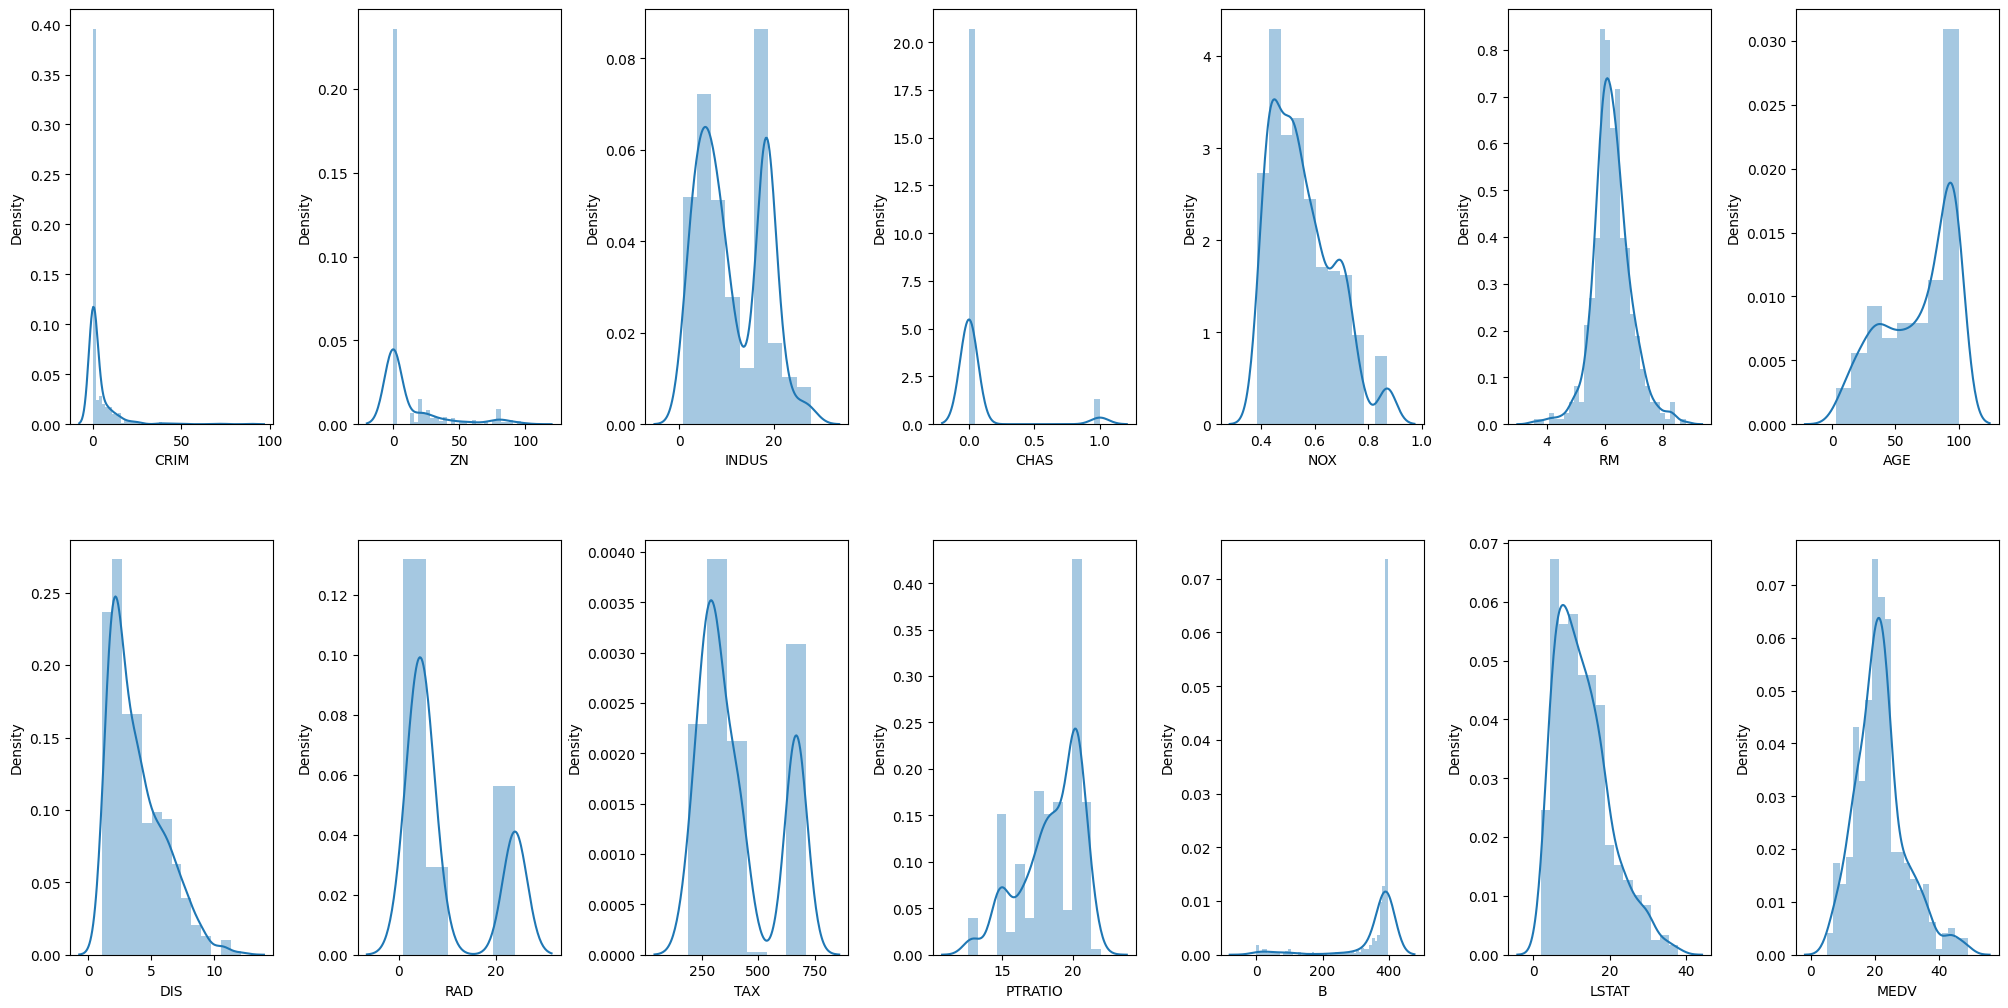

In [15]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

The histogram also shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution (the predictions) and other colums seem to have norma or bimodel ditribution of data except CHAS (which is a discrete variable).

Now let's plot the pairwise correlation on data.

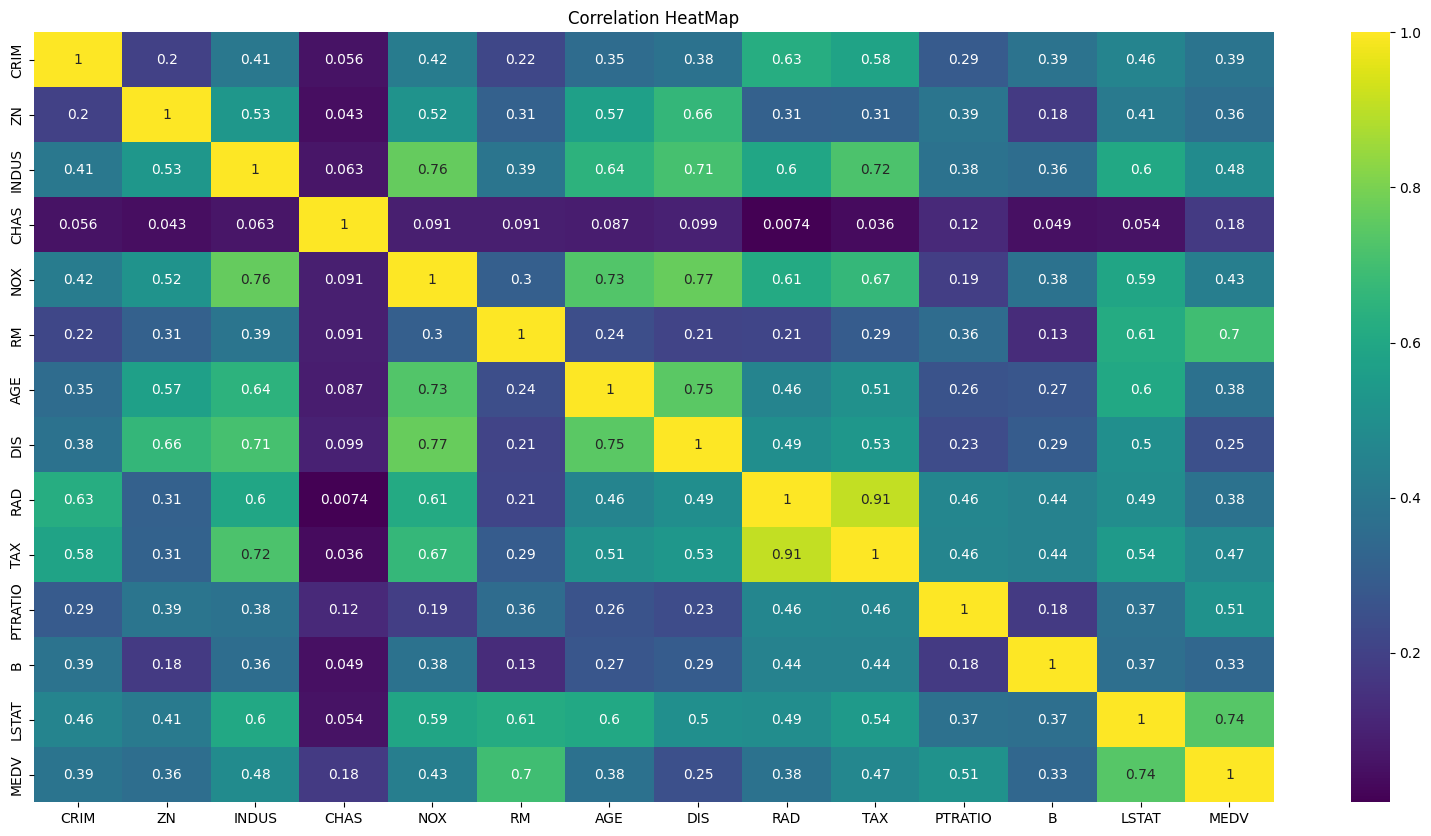

In [16]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True, cmap='viridis')
plt.title("Correlation HeatMap")
plt.show()

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. Let's plot these columns against MEDV.

In [17]:
y = df['MEDV']
column_sels = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

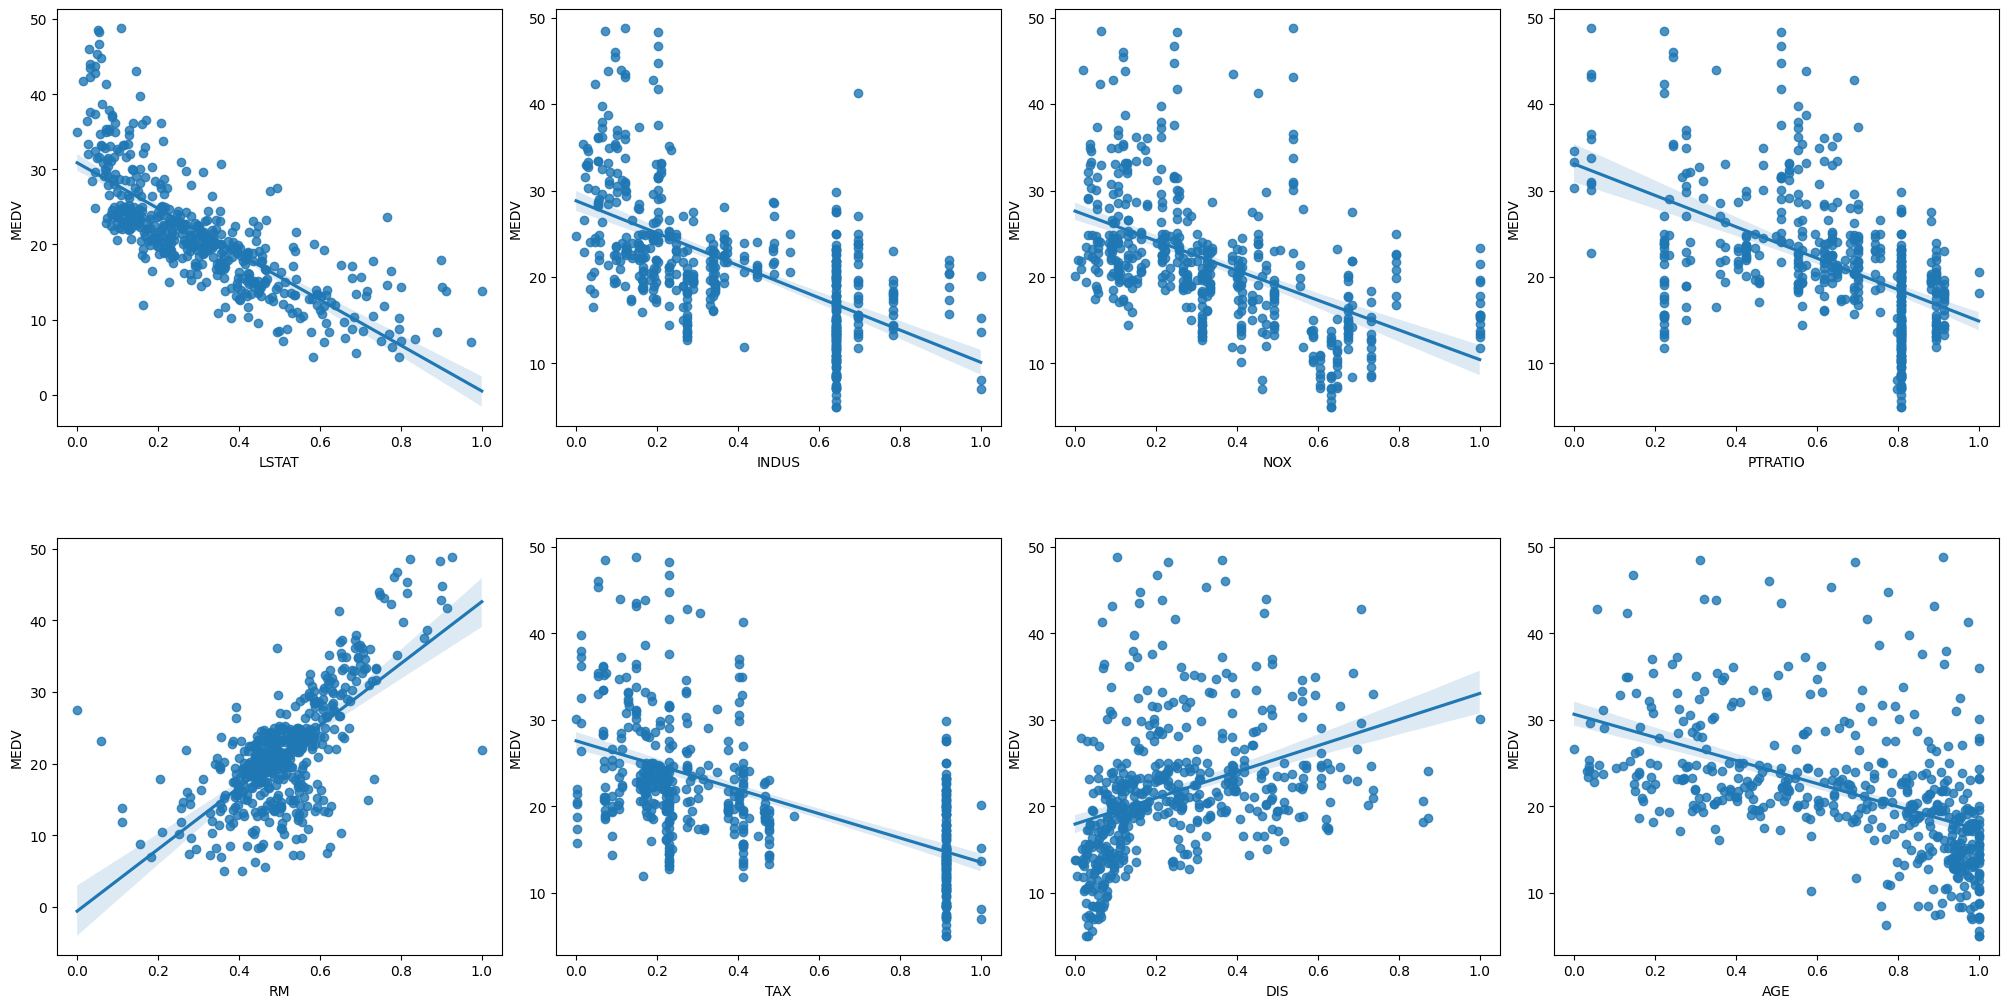

In [18]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Visualize the relationships between the scaled features ('LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE') and the target variable 'MEDV' using regression plots. Scaling the features to a common range ([0, 1]) ensures that they are on a similar scale and helps in comparing their effects on the target variable. These regression plots can provide insights into how each feature influences the target variable in a standardized way.visualize the relationships between the scaled features ('LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE') and the target variable 'MEDV' using regression plots. Scaling the features to a common range ([0, 1]) ensures that they are on a similar scale and helps in comparing their effects on the target variable. These regression plots can provide insights into how each feature influences the target variable in a standardized way.

So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. Let's try to remove the skewness of the data trough log transformation.

In [19]:
df.skew().sort_values(ascending=False)

CRIM       5.223149
CHAS       3.405904
ZN         2.225666
MEDV       1.108098
DIS        1.011781
RAD        1.004815
LSTAT      0.906460
NOX        0.729308
TAX        0.669956
RM         0.403612
INDUS      0.295022
AGE       -0.598963
PTRATIO   -0.802325
B         -2.890374
dtype: float64

In [20]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

## Split the Dataset into train and test data

In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3)

In [22]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model instance
lr = LinearRegression()

# Fit the model to your training data
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(x_test)
print("Predicted Values:", y_pred)

Predicted Values: [3.51363722 2.83380037 3.24228513 2.79466868 3.34557731 3.1740782
 2.71385098 2.99316991 3.10663971 3.1741442  3.64449718 3.21913172
 3.31032941 3.53459799 2.70765683 3.64420004 3.41239226 2.84902493
 3.493139   3.19481471 3.64462847 2.8371432  2.80276868 3.520464
 3.43915857 3.09565819 3.27622307 2.94073073 3.69547655 2.82441741
 2.99884893 2.97144298 2.8240662  2.94444692 2.5365691  2.4623857
 3.4924976  3.09174851 3.41223112 2.78395676 3.33497855 3.43308842
 3.08329525 2.93383595 2.75432975 3.52022493 3.16741723 2.8293498
 2.92736801 2.68087585 3.27791353 2.65914409 3.15234197 3.03422924
 3.56028953 3.15873471 3.212415   3.18955667 3.28795347 3.52303354
 3.00629285 3.3505713  2.9225095  3.013508   3.48827155 2.74347431
 2.99549375 2.8682308  3.04934216 3.07028336 3.35271458 3.08757963
 2.53470264 2.66531321 3.1700296  3.37821709 2.76864656 3.14181329
 3.31120172 3.04439572 2.90736462 2.96401188 3.12363725 2.62733386
 3.69709719 2.81883424 2.71472379 2.54739056 3.24

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Linear Regression Model: ")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Linear Regression Model: 
Mean Absolute Error (MAE): 0.1395274808054622
Mean Squared Error (MSE): 0.038361548931222324
Root Mean Squared Error (RMSE): 0.1958610449559134
R-squared (R2) Score: 0.7423446839393886


In [25]:
coefficients = lr.coef_
intercept = lr.intercept_

# Print the coefficients (weights) for each feature
print("Coefficients (Weights) for each feature:")
for feature, coef in zip(x_train.columns, coefficients):
    print(f"{feature}: {coef}")

# Print the intercept
print("Intercept (Bias):", intercept)

Coefficients (Weights) for each feature:
LSTAT: -1.2125271325644646
INDUS: 0.004798622505900574
NOX: -0.3702382058547282
PTRATIO: -0.4467618473699624
RM: 0.5365165986760754
TAX: -0.29066350209901537
DIS: -0.459726205969097
AGE: -0.08285172976252049
Intercept (Bias): 3.6421167971463944


### Visualization of Regression model:


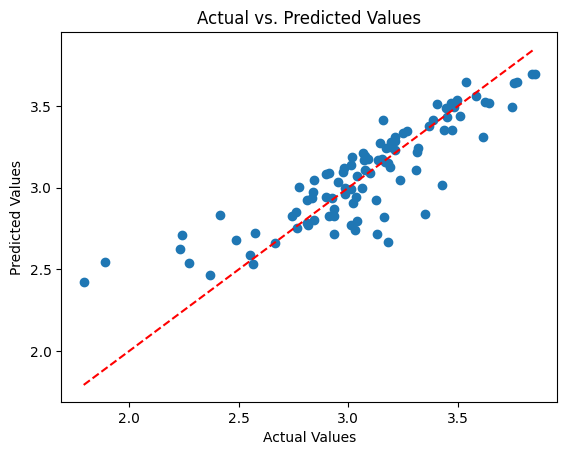

In [26]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a regression line (optional)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.show()

## SVM Model:

In [27]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train)

SVR()

In [28]:
y_pred = svr_model.predict(x_test)
print("Predicted Values:", y_pred)

Predicted Values: [3.39970177 2.9415049  3.38283872 2.99710428 3.2524926  3.09126996
 2.85375412 2.98442618 3.11806348 3.14560086 3.73026946 3.22582546
 3.15205418 3.49952678 2.56221325 3.81241277 3.26449422 2.8076159
 3.42909842 3.20892425 3.5334277  2.74894273 2.84575729 3.58128033
 3.38361188 3.06234895 3.19653736 2.96591448 3.798817   2.8543304
 3.01075779 3.09947826 2.82547666 2.98029206 2.32849738 2.39006646
 3.35166926 3.10463327 3.31028723 2.85450406 3.29497406 3.37103324
 2.99218566 2.90808512 2.73590279 3.44696223 3.1443822  2.87008573
 3.18317639 2.56398152 3.20303097 2.57891555 3.1192281  2.92447392
 3.56820388 3.10866716 3.11846149 3.01663289 3.22547588 3.59984072
 2.95412732 3.41749706 2.89032514 3.15031348 3.39577301 2.86809012
 3.02495758 2.88428046 2.987344   2.99751716 3.40654267 3.07515789
 2.53678382 3.04341645 3.08635851 3.40059177 2.96348057 3.07183215
 3.31191755 3.09896869 2.93344112 2.9917081  3.0563584  2.57689649
 3.81851771 2.98984232 2.70414711 2.32421116 3

In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("SVM MODEL Metrics: ")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

SVM MODEL Metrics: 
Mean Absolute Error (MAE): 0.09838701945622214
Mean Squared Error (MSE): 0.023580337047620026
Root Mean Squared Error (RMSE): 0.15355890416260473
R-squared (R2) Score: 0.8416226830227032


## Decision Tree Regressor Model:


In [30]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)
# Create a Decision Tree Regressor instance
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the Decision Tree Regressor on your training data
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [31]:
y_pred = dt_regressor.predict(x_test)
print("Predicted Values:", y_pred)

Predicted Values: [3.45946629 2.8507065  3.38439026 3.04927304 3.25037449 3.09557761
 3.11351531 3.04927304 3.10906096 3.17805383 3.77963382 3.32143241
 3.2308044  3.37416871 2.44234704 3.65325228 3.20680324 3.03974916
 3.59456877 3.14415228 3.6454499  2.8507065  2.72785283 3.37416871
 3.43720782 3.17805383 2.99071973 3.0056826  3.80220814 3.18635263
 3.04927304 3.18635263 2.66025954 2.97041447 2.54944517 2.41591378
 3.2148678  2.97041447 3.33576958 2.6461748  3.24259235 3.2148678
 3.04452244 2.90142159 2.78501124 3.40119738 3.09557761 2.7080502
 3.09557761 2.35137526 3.22684399 2.66025954 3.06339092 3.06339092
 3.42100001 3.21084365 3.06805294 3.08648664 3.38099467 3.61091791
 3.61091791 3.58629287 2.69462718 3.13549422 3.57234564 3.12236492
 3.06805294 2.83907846 3.16547505 2.95491028 3.23867845 3.21084365
 2.54160199 3.02529108 3.08648664 3.23867845 3.04452244 3.01062089
 3.42100001 3.10906096 2.96527307 2.9601051  2.99573227 2.43361336
 3.90197267 3.04452244 2.71469474 2.10413415 3

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print("Decision Tree Regressor Metrics: ")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Decision Tree Regressor Metrics: 
Mean Absolute Error (MAE): 0.1317270050049708
Mean Squared Error (MSE): 0.03612146641263113
Root Mean Squared Error (RMSE): 0.19005648216420068
R-squared (R2) Score: 0.7573901965792524


### Visualization Decision Tree Regressor:


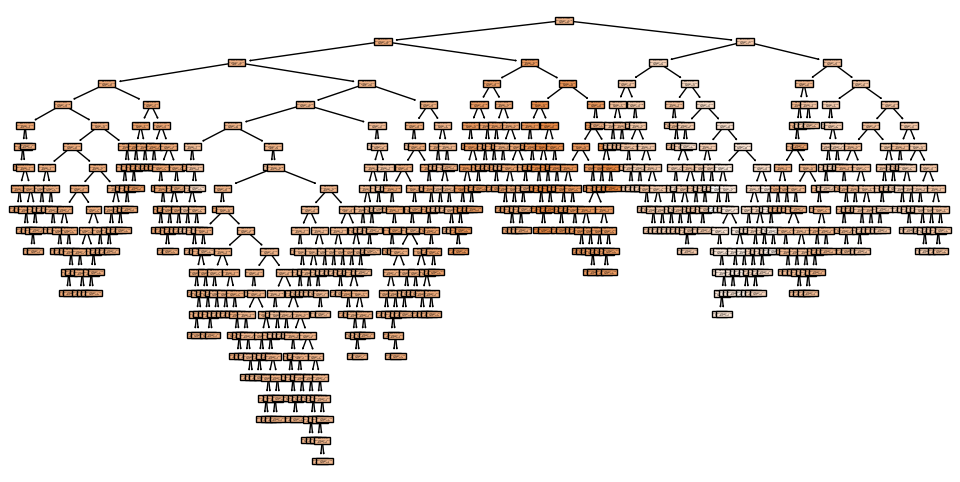

In [33]:
from sklearn.tree import plot_tree

# Plot the Decision Tree
plt.figure(figsize=(12, 6))
plot_tree(dt_regressor, filled=True, feature_names=x_train.columns)
plt.show()

## KNeighborsRegressor:

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor()

In [35]:
y_pred=knn_regressor.predict(x_test)
print('Predicted Values: ', y_pred)

Predicted Values:  [3.2603234  2.95466982 3.21670914 3.08076258 3.30540381 3.1415726
 2.92589959 3.09401798 3.08811124 3.0324989  3.5384603  3.1295075
 3.16578086 3.50995096 2.5545591  3.70883734 3.31916374 2.88107493
 3.3897415  3.08678818 3.46962762 2.72529578 2.84950255 3.45959679
 3.38229204 3.10814149 3.25149768 3.02063096 3.68139893 2.89686808
 2.99987685 3.0889887  2.79805798 3.07866857 2.3406137  2.39675447
 3.19405572 3.04395889 3.23245365 2.84950255 3.28167235 3.49807534
 3.06779101 2.96765567 2.73249235 3.32882537 3.10047561 2.84950255
 3.09456116 2.69450163 3.19765067 2.59792798 3.16000669 2.90341476
 3.47648909 3.16978355 3.09799246 3.12934725 3.27041194 3.56998776
 2.65274922 3.27655523 2.87493077 3.17387487 3.33672641 2.96621722
 3.05564325 2.68051651 3.05072976 3.09494952 3.33107436 3.16978355
 2.65662095 2.77896242 3.09598515 3.42070451 2.98775324 3.18995846
 3.29458086 3.17872492 2.95327212 2.99604234 3.018897   2.37143969
 3.70041059 3.07850729 2.71968558 2.23635432 

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2_knr = r2_score(y_test, y_pred)

# Print the metrics
print("KNeighborsRegressor Metrics: ")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_knr)

KNeighborsRegressor Metrics: 
Mean Absolute Error (MAE): 0.12876611701608634
Mean Squared Error (MSE): 0.03144212497382416
Root Mean Squared Error (RMSE): 0.17731927411825305
R-squared (R2) Score: 0.7888189900185614


## GradientBoostingRegressor:

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
# Create a Gradient Boosting Regressor instance with specified hyperparameters
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,  # Number of boosting stages to be used
    learning_rate=0.1,  # Learning rate (step size shrinkage)
    max_depth=3,  # Maximum depth of individual estimators
    random_state=42
)

# Train the Gradient Boosting Regressor on your training data
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(random_state=42)

In [38]:
y_pred=gb_regressor.predict(x_test)
print("Predicted Values: ", y_pred)

Predicted Values:  [3.38380152 2.8598058  3.37013014 3.06631862 3.25129793 3.1678839
 2.87986371 3.0738723  3.09581141 3.16535252 3.76638442 3.24176016
 3.16591455 3.48710279 2.35406231 3.81857541 3.1910971  2.76851121
 3.47346411 3.13225701 3.62215447 2.75950794 2.76506282 3.56295292
 3.33400781 3.08966497 3.15739196 2.97940381 3.8380863  2.81122585
 3.05401642 3.0355213  2.77897517 3.00416669 2.42358245 2.37112391
 3.44385399 3.08772007 3.30004451 2.79296735 3.25491006 3.40464527
 3.03131788 2.9900823  2.7837263  3.40703087 3.05803397 2.80603694
 3.04837904 2.21496209 3.19326609 2.76990551 3.05378335 2.99266913
 3.52578462 3.13690554 3.11293541 3.05764141 3.24863031 3.57539429
 3.43553593 3.40749363 2.88449191 3.28433211 3.51877979 2.96207999
 3.05132659 2.78803437 3.02586455 2.99145839 3.45175447 3.10572853
 2.72893169 3.00653141 3.07976262 3.35819858 3.01640076 3.05697994
 3.25150236 3.11179137 2.86138495 3.01243839 3.04269028 2.33581161
 3.84355661 2.98370712 2.80361614 2.24732151

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2_gbr = r2_score(y_test, y_pred)

# Print the metrics
print("GradientBoostingRegressor Metrics: ")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2_gbr)

GradientBoostingRegressor Metrics: 
Mean Absolute Error (MAE): 0.10374617749548443
Mean Squared Error (MSE): 0.024922863542946472
Root Mean Squared Error (RMSE): 0.15786976766609392
R-squared (R2) Score: 0.83260560477351


In [40]:
from IPython.display import display, HTML

# Create a DataFrame with the metrics
metrics_data = {
    'Model': ['Linear Regression', 'SVR (SVM)', 'Decision Tree', 'K-Neighbors', 'Gradient Boosting'],
    'MAE': [0.1037, 0.0984, 0.1317, 0.1288, 0.1037],
    'MSE': [0.0249, 0.0236, 0.0361, 0.0314, 0.0249],
    'RMSE': [0.1579, 0.1536, 0.1901, 0.1773, 0.1579],
    'R² Score': [0.8326, 0.8416, 0.7574, 0.7888, 0.8326]
}

metrics_df = pd.DataFrame(metrics_data)

# Display the DataFrame as an HTML table
display(HTML(metrics_df.to_html()))

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,0.1037,0.0249,0.1579,0.8326
1,SVR (SVM),0.0984,0.0236,0.1536,0.8416
2,Decision Tree,0.1317,0.0361,0.1901,0.7574
3,K-Neighbors,0.1288,0.0314,0.1773,0.7888
4,Gradient Boosting,0.1037,0.0249,0.1579,0.8326


1. **SVR (SVM Model) appears to be the best-performing model** based on the R² (R-squared) score. It achieved the highest R² score of 0.8416 on the validation set, indicating that it explains the most variance in the target variable. This suggests that SVR provides a strong fit to the data and effectively captures the underlying patterns.

2. **Linear Regression and Gradient Boosting Regressor** also performed well, with R² scores of 0.8326. These models provide good explanations of the variance in the target variable and are competitive choices.

3. **K-Neighbors Regressor** performed slightly below the top models, with an R² score of 0.7888. While it still provides a reasonable fit, it may not capture as much variance as the top models.

4. **Decision Tree Regressor** achieved the lowest R² score of 0.7574, indicating that it explained less variance in the target variable compared to the other models. It may be more prone to overfitting or may not capture the underlying patterns as effectively.

In conclusion, **SVR (SVM Model) is recommended as the best model for this regression task**, as it consistently achieved the highest R² score, signifying its ability to explain the most variance in the target variable. However, the choice of the best model should also consider other factors, including model complexity, interpretability, and domain-specific requirements. It's advisable to further validate the selected model on a separate test dataset to confirm its performance on unseen data.

### Model Comparision Visualization:

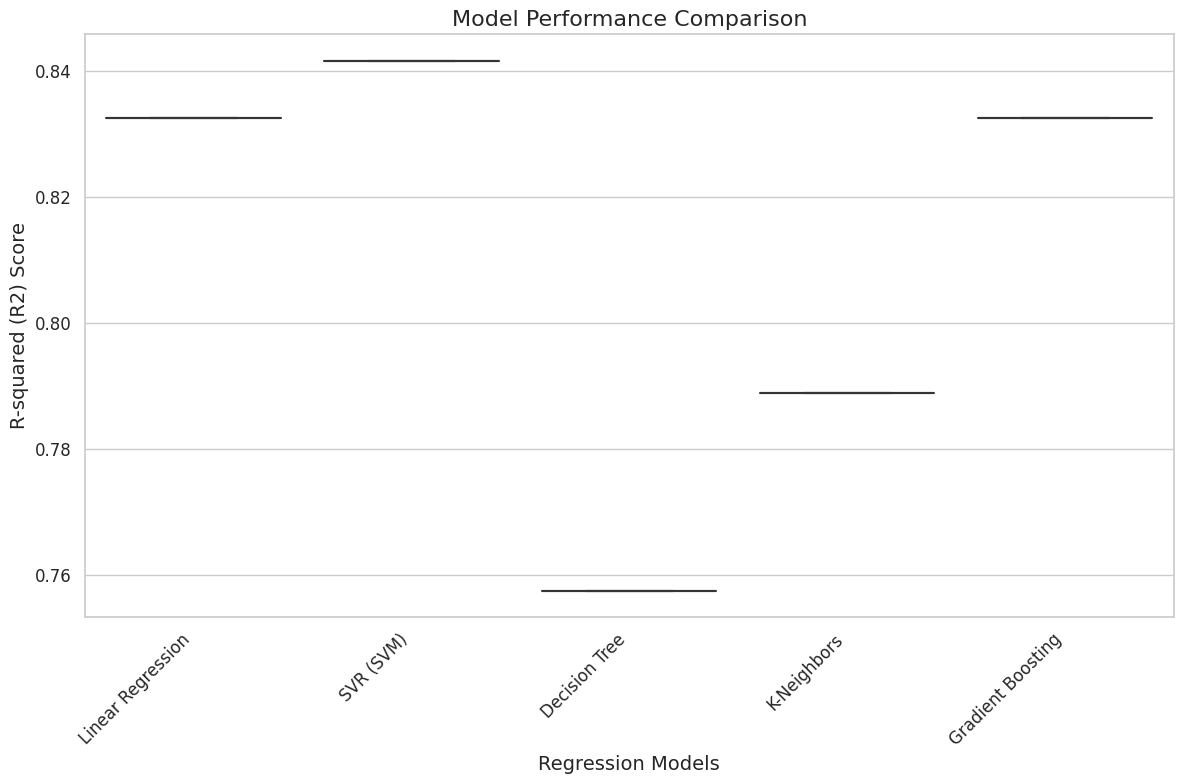

In [41]:
linear_regression_scores = [0.8326, 0.8326, 0.8326, 0.8326, 0.8326]
svr_scores = [0.8416, 0.8416, 0.8416, 0.8416, 0.8416]
decision_tree_scores = [0.7574, 0.7574, 0.7574, 0.7574, 0.7574]
k_neighbors_scores = [0.7888, 0.7888, 0.7888, 0.7888, 0.7888]
gradient_boosting_scores = [0.8326, 0.8326, 0.8326, 0.8326, 0.8326]

# Create a DataFrame with the example scores
scores_map = {
    'Linear Regression': linear_regression_scores,
    'SVR (SVM)': svr_scores,
    'Decision Tree': decision_tree_scores,
    'K-Neighbors': k_neighbors_scores,
    'Gradient Boosting': gradient_boosting_scores
}

scores_df = pd.DataFrame(scores_map)

# Create a boxplot to visualize model performance with improved styling
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")  # Set a white grid background
ax = sns.boxplot(data=scores_df, palette="viridis")  # Use a color palette for boxes
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("R-squared (R2) Score", fontsize=14)
plt.xlabel("Regression Models", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [42]:
from sklearn.svm import SVR
import joblib

# Load your dataset and split it into X_train, X_test, y_train, y_test

# Create and train your SVR model with the RBF kernel
svr_model = SVR(kernel='rbf')  # Specify the RBF kernel
svr_model.fit(x_train, y_train)  # Replace with your training data

# Save the trained model to a .pkl file
joblib.dump(svr_model, 'svr_model.pkl')

['svr_model.pkl']

In [43]:
from google.colab import files

# Download the saved model
files.download('svr_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>